 # Samenvatting

## Begrip kansverdeling

### Relatie met frequenties
Stel:
- Je gooit met 2 dobbelstenen en schrijft de som van de twee waarden op.
- Wat is de kans dat je een 3 gooit en wat is de kans dat je een 7 gooit?
Deze kansen kunnen benaderen door het experiment heel vaak uit te voeren en te kijken hoe vaak je een 3 of een 7 gooit.
We kunnen de kans ook theoretisch berekenen.
- Er zijn 36 mogelijke uitkomsten (6 mogelijkheden voor de eerste dobbelsteen en 6 mogelijkheden voor de tweede dobbelsteen).

**Worpen**

|       | 1     | 2     | 3     | 4     | 5     | 6     |
|-------|-------|-------|-------|-------|-------|-------|
| **1** | (1,1) | (1,2) | (1,3) | (1,4) | (1,5) | (1,6) |
| **2** | (2,1) | (2,2) | (2,3) | (2,4) | (2,5) | (2,6) |
| **3** | (3,1) | (3,2) | (3,3) | (3,4) | (3,5) | (3,6) |
| **4** | (4,1) | (4,2) | (4,3) | (4,4) | (4,5) | (4,6) |
| **5** | (5,1) | (5,2) | (5,3) | (5,4) | (5,5) | (5,6) |
| **6** | (6,1) | (6,2) | (6,3) | (6,4) | (6,5) | (6,6) |

⇒

**Som van de ogen**

|       | 1 | 2 | 3 | 4  | 5  | 6  |
|-------|---|---|---|----|----|----|
| **1** | 2 | 3 | 4 | 5  | 6  | 7  |
| **2** | 3 | 4 | 5 | 6  | 7  | 8  |
| **3** | 4 | 5 | 6 | 7  | 8  | 9  |
| **4** | 5 | 6 | 7 | 8  | 9  | 10 |
| **5** | 6 | 7 | 8 | 9  | 10 | 11 |
| **6** | 7 | 8 | 9 | 10 | 11 | 12 |

Uit bovenstaande tabel kunnen we afleiden dat:
- Het gooien van een som van 7 het vaakste voorkomt.

Als we willen weten wat de kans is om een 3 te gooien, dan moeten we tellen hoeveel van de 36 mogelijkheden een som van 3 opleveren. Dit zijn er 2: (1,2) en (2,1). De kans om een 3 te gooien is dus 2/36 = 1/18.

Voor de andere waarden vinden we:

| Waarde | Kans |
|--------|------|
| 2      | 1/36 |
| 3      | 2/36 |
| 4      | 3/36 |
| 5      | 4/36 |
| 6      | 5/36 |
| 7      | 6/36 |
| 8      | 5/36 |
| 9      | 4/36 |
| 10     | 3/36 |
| 11     | 2/36 |
| 12     | 1/36 |

In Python kunnen we deze kansen ook laten zien:

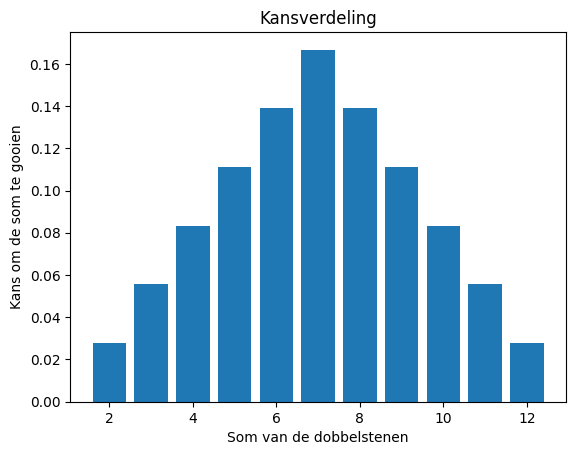

In [1]:
from functions.functions_Y2.Kansverdeling import *
import pandas as pd

value = range(2, 13)
prob = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36

verdeling = pd.Series([value, prob])

kansverdeling(verdeling, 'Som van de dobbelstenen', 'Kans om de som te gooien')

Bovenstaande grafiek wordt een kansverdeling genoemd.
Een kansverdeling is een overzicht van alle relatieve frequenties van een oneindige steekproef.


## Gemiddelde en standaardafwijking
Aangezien een kansverdeling een frequentietabel is, kunnen we hiervoor het gemiddelde en de standaardafwijking berekenen.
De formule voor het gemiddelde is:
$$ x̅ = \sum_{i=1}^{n} x_i \cdot f_i$$
en voor de standaardafwijking:
$$ s = \sqrt{\sum_{i=1}^{n} (x_i - x̅)^2 \cdot f_i}$$

Om deze formules te gebruiken voor een kansverdeling, moeten we de frequenties vervangen door kansen. De formules worden dan:
$$ μ = \sum_{i=1}^{n} x_i \cdot P(x_i)$$
en
$$ σ = \sqrt{\sum_{i=1}^{n} (x_i - x̅)^2 \cdot P(x_i)}$$

Deze kunnen in python worden berekend als volgt:

In [2]:
from functions.functions_Y2.Kansverdeling import *

µ = (value * prob).sum()
#of
average(value, prob)

6.999999999999998

In [3]:
σ = math.sqrt(((value - µ) ** 2 * prob).sum())
#OF
standard_deviation(value, prob)

2.41522945769824

De gevonden waarden betekenen dat:
- Het gevonden gemiddelde is het verwachte gemiddelde van een steekproef. Als we een steekproef doen, verwachten we dus een gemiddelde in de buurt van dit gemiddelde. Daarom dat men dit getal "verwachten waarde" noemt.
- De gevonden standaardafwijking is ook de verwachte (gemiddelde) afwijking die we bij een steekproef zouden vinden.

In dit geval vinden we dat μ = 7 en σ = 2.415. Als we dus een steekproef zouden doen, dan verwachten we dat de gegooide waarde gemiddeld rond de 7 zal liggen. We verwachten ook dat de gemiddelde afwijking van alle waarden ten opzichte van die 7, ongeveer 2.4 zal zijn.

## Veel voorkomende kansverdelingen
Er zijn een aantal veel voorkomende kansverdelingen:
Er zijn in principe twee categorieën van kansverdelingen:
- Discrete kansverdelingen
- Continue kansverdelingen

We zien 3 kansverdelingen:
- De binomiaalverdeling
- De Poissonverdeling
- De normaalverdeling

### De binomiaalverdeling
De binomiaalverdeling is een kansverdeling die relijk eenvoudig te begrijpen is. Je kan de formule ervan zelfs eenvoudig afleiden uit de somregel en de productregel.

#### Context
De binomiaalverdeling is van toepassing in de volgende context:
- Je doet een experiment een totaal aantal keren, $n$, achter elkaar.
- De uitkomst van het experiment beïnvloedt het resultaat van het volgende experiment niet.
- De uitkomst van het experiment kan slechts **twee mogelijke waarden**, succes of mislukking, opleveren.
- Je weet wat de kansen, $p$ en $q = 1 - p$ zijn om de twee waarden te verkrijgen als je het experiment één keer uitvoert.
- Je vraagt je af wat de kans is dat je aantal keren ($x$) een bepaalde waarde verkrijgt.

#### Voorbeeld
Stel:
- Een toets met 5 meerkeuzevragen
- Iedere vraag heeft 4 mogelijke oplossingen
- Wat is de kans dat je 2/5 haalt als je alle vragen gokt?

Dit berekenen we met behulp van volgende formule:
$$ P(X) = \binom{n}{x} \cdot p^x \cdot q^{n-x}$$

waarbij:
- n = het aantal keer dat je het experiment doet
- p = De kans dat een experiment de waarde oplevert waarin je geïnteresseerd bent
- x = Het aantal keer dat je wil dat het experiment de waarde oplevert waarin je geïnteresseerd bent
- $\binom{n}{x}$ = het aantal mogelijkheden om uit $n$ waarden, er $x$ te kiezen. Oftwel $C^n_x$

De formule kan in Python worden berekend als volgt:

In [4]:
from scipy import stats

n = 5  #5 vragen op de test
p = 1 / 4  #kans om een vraag juist te beantwoorden
x = 2  #aantal vragen juist beantwoord
prob = stats.binom.pmf(x, n, p)  #De kans dat we 2 vragen juist beantwoorden

prob

0.26367187499999983

We kunnen ook de complete kansverdeling laten zien:

In [5]:
n = 5  #5 vragen op de test
p = 1 / 4  #kans om een vraag juist te beantwoorden
x = range(0, 5)  #aantal vragen juist beantwoord
prob = stats.binom.pmf(x, n, p)  #De kans dat we x vragen juist beantwoorden

prob

array([0.23730469, 0.39550781, 0.26367187, 0.08789062, 0.01464844])

We kunnen deze kansverdeling ook laten zien:

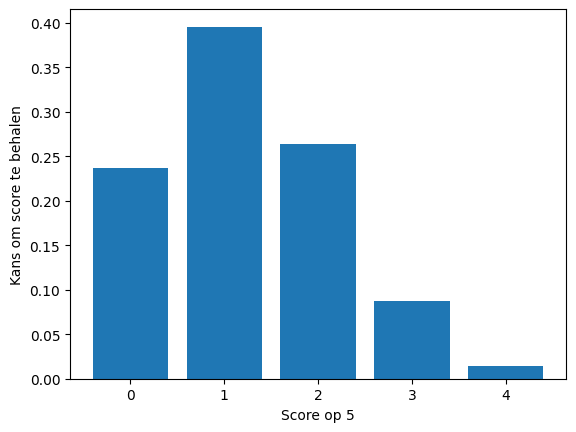

In [6]:
fix, ax = plt.subplots()
_ = ax.bar(x, prob)
_ = ax.set_xlabel('Score op 5')
_ = ax.set_ylabel('Kans om score te behalen')

We kunnen ook berekenen wat de kans is om te buizen. Dit is de kans dat je 0/5, 1/5 of 2/5 haalt.

In [7]:
n = 5  #5 vragen op de test
p = 1 / 4  #kans om een vraag juist te beantwoorden
x = range(0, 3)  #aantal vragen juist beantwoord

X = stats.binom.pmf(x, n, p).sum()  #De kans dat we x vragen juist beantwoorden

X

0.8964843749999996

Bovenstaande berekening toont aan dat de kans om te buizen bijna 90% is.
We kunnen de vorige formule ook op snellere manier berekenen:

In [8]:
n = 5  #5 vragen op de test
p = 1 / 4  #kans om een vraag juist te beantwoorden
x = range(0, 6)  #aantal vragen juist beantwoord

X = stats.binom.cdf(x, n, p)

X

array([0.23730469, 0.6328125 , 0.89648438, 0.984375  , 0.99902344,
       1.        ])

cdf zal de cumulatieve kansverdeling gebruiken. Dit betent dat de kans van n gelijk is aan de som van de kansen van 0 tot n.
Vorige formule kan in Python ook op een andere manier worden berekend:

In [9]:
n = 5  #5 vragen op de test
p = 1 / 4  #kans om een vraag juist te beantwoorden
x = range(0, 6)  #aantal vragen juist beantwoord

X = stats.binom.pmf(x, n, p).cumsum()

X

array([0.23730469, 0.6328125 , 0.89648437, 0.984375  , 0.99902344,
       1.        ])

Als je 80% kans zou hebben om het antwoord juist te hebben in de plaats van te gokken dan zou de kans om te buizen gelijk zijn aan:

In [10]:
n = 5  #5 vragen op de test
p = 0.8  #kans om een vraag juist te beantwoorden
x = 2  #aantal vragen juist beantwoord
X = stats.binom.cdf(x, n, p)

X

0.05791999999999996

En om te slagen:

In [11]:
n = 5  #5 vragen op de test
p = 0.8  #kans om een vraag juist te beantwoorden
x = 2  #aantal vragen juist beantwoord
X = 1 - stats.binom.cdf(x, n, p)

X

0.94208

#### Verwachte waarde en standaardafwijking
De verwachte waarde geeft weer hoeveel maal je experiment gemiddeld zal slagen als je $n$ experimenten doet.
Je kan deze berekenen met de algemene formule die we hiervoor zagen, maar in het geval van een binomiaalverdeling worden deze eenvoudiger.
Verwachte waarde:
$$ μ = n \cdot p$$
Standaardafwijking:
$$ σ = \sqrt{n \cdot p \cdot (1-p)}$$

Voor het voorbeeld van de toets:
$ μ = 5 \cdot \frac{1}{4} = 1.25$
En
$ σ = \sqrt{5 \cdot \frac{1}{4} \cdot \frac{3}{4}} = 0.97$

#### Grafisch
Stel:
- Je maakt een website met 20 pagina's
- Da kans dat er nog een fout in een pagina zit is 0.2
- We kunnen nagaan wat de kans is dat er x pagina's fouten bevatten.

We stellen dit grafisch voor:

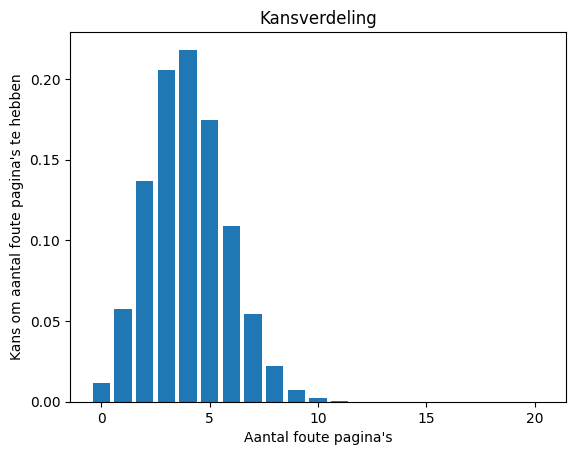

In [12]:
n = 20
p = 0.2
x = range(0, 21)

kansverdeling([x, stats.binom.pmf(x, n, p)], 'Aantal foute pagina\'s', 'Kans om aantal foute pagina\'s te hebben')

Er is duidelijk een grote piek aan de linkerkant van de grafiek.
Een binomiaalverdeling is kenmerkend voor snel te stijgen en dan terug af te nemen.
Men zegt ook wel van de binomiaalverdeling dat deze **rechtsscheef** is.

### De Poissonverdeling
De Poissonverdeling is een verdeling die heel erg veel voorkomt in de theoretische informatica. Ze wordt gebruikt bij het beschrijven van **wachtrijen** en die komen vaak voor in netwerken.

#### Context
De Poissonverdeling is van toepassing in de volgende context:
- Een gebeurtenis doet zich gemiddeld een aantal keren voor per tijdseenheid, maar er zit variatie op.
- We vragen ons af wat de kans is dat deze gebeurtenis zich een aantal keren voordoet binnen een bepaalde tijd.

#### Voorbeeld
Stel:
- Op een helpdesk komen er gemiddeld 3 oproepen per uur binnen.
- We vragen ons af wat de kans is dat er meer dan 10 oproepen per uur zouden binnenkomen.

Dit kunnen we berekenen met volgende formule:
$$ P(k) = \frac{λ^k}{k!} \cdot e^{-λ}$$

In Python kunnen we dit als volgt berekenen:

In [13]:
x = range(0, 11)
λ = 3
Pk = stats.poisson.pmf(x, λ)

Pk

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ,
       0.00081015])

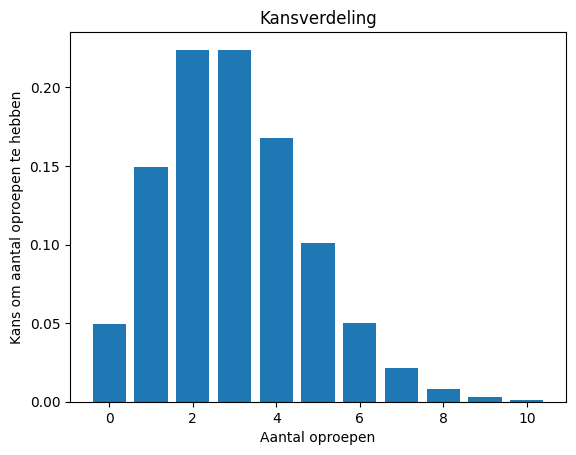

In [14]:
#grafisch voorgesteld
kansverdeling([x, Pk], 'Aantal oproepen', 'Kans om aantal oproepen te hebben')

Als we willen weten wat de kans is dat er meer dan 10 oproepen zullen binnen komen gebruiken we de cumulatieve kansverdeling:

In [15]:
x = range(0, 11)
λ = 3
Pk = 1 - stats.poisson.cdf(x, λ)

Pk

array([9.50212932e-01, 8.00851727e-01, 5.76809919e-01, 3.52768111e-01,
       1.84736755e-01, 8.39179420e-02, 3.35085353e-02, 1.19045039e-02,
       3.80299206e-03, 1.10248813e-03, 2.92336951e-04])

Als we willen bepalen hoeveel mensen we nodig hebben om 95% van de tijd de klant te kunnen helpen, dan kunnen we dit als volgt berekenen:

In [16]:
λ = 3
x = 0.95

n = stats.poisson.ppf(x, λ)

n

6.0

#### Verwachte waarde en standaardafwijking
De verwachte waarde:
$$ μ = λ$$
De standaardafwijking:
$$ σ = \sqrt{λ}$$

### De normaalverdeling
Als voorbeeld nemen we de lengte van het eerste jaar toegepaste informatica studenten. Een lengte is een continue variabele.
Stel:
- we verwachten dat het gemiddelde (μ) 180 cm is
- we verwachten dat de standaardafwijking (σ) 10 cm is
- Dan kunnen we ons afvragen wat de kans is dat een student tussen 175 en 180 cm is.

De normaalverdeling heeft volgende functie:
$$ f(x) = \frac{1}{σ \cdot \sqrt{2π}} \cdot e^{-\frac{(x-μ)^2}{2σ^2}}$$

In Python kunnen we dit als volgt berekenen:

In [17]:
μ = 180
σ = 10
low = 150

fx = stats.norm.pdf(low, μ, σ)

fx

0.00044318484119380076

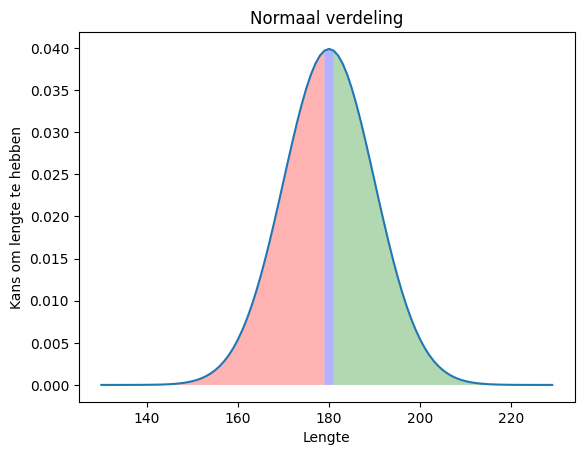

In [18]:
#grafisch voorgesteld
import numpy as np

x = np.arange(130, 230.0, 1.0)
p = stats.norm.pdf(x, loc=180, scale=10)

normaal_verdeling(x, p, μ, 'Lengte',
                  'Kans om lengte te hebben')

Wat is de kans dat een persoon zijn lengte tussen 175 en 180 cm is?

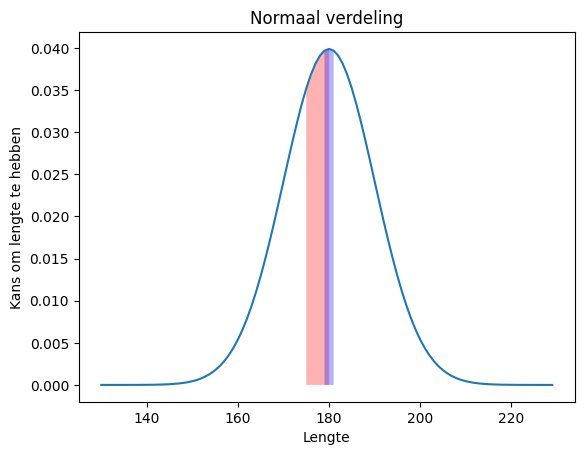

In [19]:
normaal_verdeling(x, p, μ, 'Lengte',
                  'Kans om lengte te hebben', lower=175, upper=180)

De kans dat een persoon tussen 175 en 180 cm is is gelijk aan het oppervlak onder de curve tussen 175 en 180. Deze kna gevonden worden met gebruik van de **cumulatieve kansverdeling**. Met Python kunnen we dit zo berekenen:

In [20]:
#De onderstaande functies berekenen het oppervlak onder de curve van -∞ tot x
#Daarom moet de upper limit worden afgetrokken van de lower limit
p = stats.norm.cdf(180, μ, σ) - stats.norm.cdf(175, μ, σ)

p

0.19146246127401312

#### Eigenschappen
- 68.3% van de waarden ligt tussen μ - σ en μ + σ
- 95.5% van de waarden ligt tussen μ - 2σ en μ + 2σ
- 99.7% van de waarden ligt tussen μ - 3σ en μ + 3σ